In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [8]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

In [5]:
from data_analysis import *
from visualisation import *
from preprocessing import *
from implementations import *

## Do your thing crazy machine learning thing here :) ...

In [5]:
def least_squares_GD(y, tx, w_initial, max_iters, gamma):
    """Compute Least Squares with Gradient Descent"""
    """INPUTS : vector with data (tx, y), the initial w, the maximum number of iterations and the learning rate gamma"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w = w_initial
    for i in range(max_iters) :
        sum_grad_loss = 0
        for j in range(N) : 
            sum_grad_loss+=(y[j]-tx[j].T*w)*tx[j]
        mse_grad_loss = (1/N)*sum_grad_loss
        w = w - gamma*mse_grad_loss
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [6]:
def least_squares(y, tx):
    """Compute Least Squares with normal equations"""
    """INPUTS : vector with data (tx, y)"""
    """OUTPUTS : the weights w of the model """
    w =  np.matmul(np.linalg.solve(np.matmul((tx.T), tx),(tx.T)), y)
    N = len(y)
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [7]:
def ridge_regression(y, tx, lambda_): 
    """Compute Ridge Regresssion with normal equations"""
    """INPUTS : vector with data (tx, y) and penalty parameter lambda_"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w =  np.matmul(np.linalg.solve((np.matmul((tx.T), tx)+lambda_*2*N*np.identity(tx.shape[1])),(tx.T)), y)
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss + lambda_*np.sum(np.square(w))
    return (w, loss)

In [12]:
def least_squares_SGD(y, tx, w_initial, max_iters, gamma):
    """Compute Least Squares with Stochastic Gradient Descent"""
    """INPUTS : vector with data (tx, y), the initial w, the maximum number of iterations and the learning rate gamma"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w = w_initial
    i=0
    while i<max_iters :
        for j in range(N) : 
            mse_grad_loss = -2*tx[j]*(y[j]-np.dot(w,tX[j]))
            w = w - gamma*mse_grad_loss
            break
        i+=1
        break
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [13]:
#Try with all data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], tX[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, tX[30000:])
print(np.dot(tX[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

[6.83007757e+02 2.30558407e+01 1.62551144e+02 1.27963018e+01
 1.15302776e+00 2.45678669e+04 9.02335079e+00 5.04648176e-01
 4.87422341e+00 3.02741713e+03 5.01971833e-01 4.99057302e-01
 4.43101794e-01 5.21360502e+00 4.99999863e-01 4.99993046e-01
 1.63405586e+01 4.99969699e-01 4.99957386e-01 2.64327393e+00
 5.00013931e-01 8.07227965e+03 5.00786464e-01 8.88387504e+01
 5.00004409e-01 4.99998731e-01 2.97485923e+03 1.96761962e+00
 1.05494994e+01 3.88787675e+02]
[-233.60753249  559.22670433 -144.30743214 ... -118.56716364 -205.63537742
 -185.95824873]
(30,)
0.6212136363636364


In [14]:
#Try with normalized data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], normalized_x[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, normalized_x[30000:])
print(np.dot(normalized_x[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: operands could not be broadcast together with shapes (30,) (23,) 

In [6]:
#Quick testing of functions
w_initial = np.ones(30)
max_iters=10
gamma = 0.1
lambda_ = 0.01
w_lsgd = least_squares_GD(y, tX, w_initial, max_iters, gamma)
w_lssgd = least_squares_SGD(y, tX, w_initial, max_iters, gamma)
w_ls = least_squares(y, tX)
w_rg = ridge_regression(y, tX, lambda_)

<ipython-input-3-2388e52d1166>:9: RuntimeWarning: overflow encountered in multiply
  mse_grad_loss = (y[j]-tx[j].T*w)*tx[j]
<ipython-input-3-2388e52d1166>:9: RuntimeWarning: invalid value encountered in multiply
  mse_grad_loss = (y[j]-tx[j].T*w)*tx[j]


MemoryError: Unable to allocate 466. GiB for an array with shape (250000, 250000) and data type float64

In [ ]:
print(w_lsgd, w_lssgd, w_ls, w_rg)

## Generate predictions and save ouput in csv format for submission:

In [20]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [21]:
OUTPUT_PATH = '../output' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

PermissionError: [Errno 13] Permission denied: '../output'

## Selection of model parameters

In [6]:
from param_selection import gamma_grid_search, lambda_grid_search

In [9]:
gammas = np.logspace(-4, 0, 10)
k_fold = 4

loss_logreg, loss_ls_GD, loss_ls_SGD = gamma_grid_search(y, tx, gammas, k_fold)

1


/Users/Nicolas/anaconda3/envs/ada/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:16: RuntimeWarning: overflow encountered in exp
  return - np.dot(y, np.matmul(tx, w)) + np.sum(np.log(1 + np.exp(np.matmul(tx, w))))


2
3
4
5
6
7
8
9
10


/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:88: RuntimeWarning: overflow encountered in subtract
  w = w - gamma*mse_grad_loss


In [34]:
def plot_gamma_search(gammas, losses, folder_path):

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    xlabels = ['logistic_regression', 'least_squares_GD', 'least_squares_SGD']

    for ax_nb in range(1): #set back to 3
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].semilogx(gammas, loss[:, 0], marker=".", color='b', label='train error')
        axes[ax_nb].semilogx(gammas, loss[:, 1], marker=".", color='r', label='test error')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Gamma grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'gammas'))
    plt.show()

[[1894481.18146822 -311944.86534803]
 [             inf -864939.14388482]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]
 [             inf              inf]]


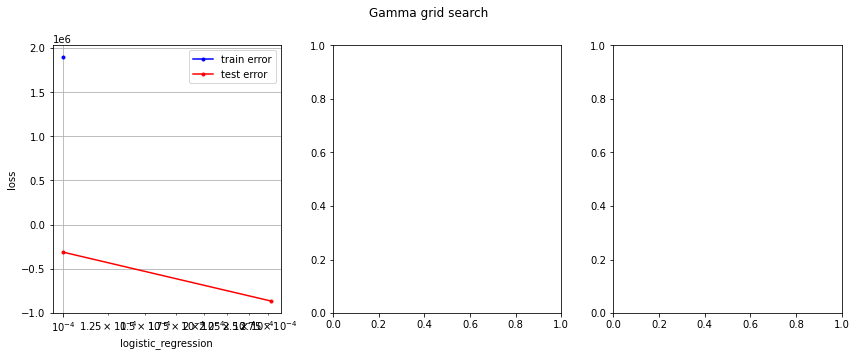

In [35]:
folder_path = '../figs/'

plot_gamma_search(gammas, [loss_logreg, loss_ls_GD, loss_ls_SGD], folder_path)

In [42]:
lambdas = np.linspace(0, 2, 20)
loss_logreg_reg, loss_ridge = lambda_grid_search(y, tx, lambdas, k_fold)

1


/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:17: RuntimeWarning: overflow encountered in exp
  return - np.dot(y, np.matmul(tx, w)) + np.sum(np.log(1 + np.exp(np.matmul(tx, w))))
/Users/Nicolas/anaconda3/envs/ada/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [46]:
def plot_lambda_search(lambdas, losses, folder_path):

    fig, axes = plt.subplots(1, 2, figsize=(8, 5))

    xlabels = ['reg_logistic_regression', 'ridge_regression']

    for ax_nb in range(1): #set back to 2
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].semilogx(lambdas, loss[:, 0], marker=".", color='b', label='train error')
        axes[ax_nb].semilogx(lambdas, loss[:, 1], marker=".", color='r', label='test error')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Lambda grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'lambdas'))
    plt.show()

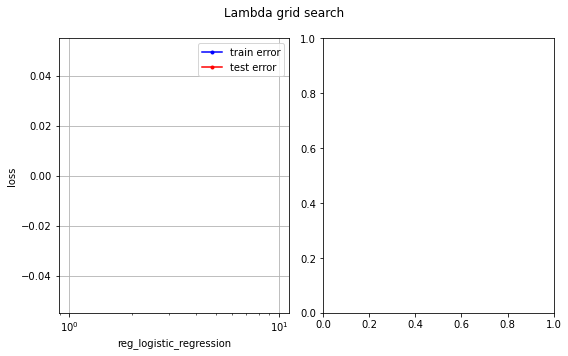

In [47]:
plot_lambda_search(lambdas, [loss_logreg_reg, loss_ridge], folder_path)